# Data API

- `tf.data`: https://www.tensorflow.org/api_docs/python/tf/data
- `tf.data.datasets`



## tf.data.datasets

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
builders = tfds.list_builders()
print(builders)

['abstract_reasoning', 'aeslc', 'aflw2k3d', 'amazon_us_reviews', 'arc', 'bair_robot_pushing_small', 'beans', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'cmaterdb', 'cnn_dailymail', 'coco', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'cos_e', 'curated_breast_imaging_ddsm', 'cycle_gan', 'deep_weeds', 'definite_pronoun_resolution', 'diabetic_retinopathy_detection', 'div2k', 'dmlab', 'downsampled_imagenet', 'dsprites', 'dtd', 'duke_ultrasound', 'dummy_dataset_shared_generator', 'dummy_mnist', 'emnist', 'eraser_multi_rc', 'esnli', 'eurosat', 'fashion_mnist', 'flic', 'flores', 'food101', 'gap', 'gigaword', 'glue', 'groove', 'higgs', 'horses_or_humans', 'i_naturalist2017', 'image

In [3]:
data, info = tfds.load('mnist', with_info=True)
train_data, test_data = data['train'], data['test']

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.0. Subsequent calls will reuse this data.


In [4]:
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.0,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



## tf.data

- 생성
  - `from_tensor_slices()`: 개별 또는 다중 넘파이를 받고, 배치를 지원

  - `from_tensors()`: 배치를 지원하지 않음

  - `from_generator()`: 생성자 함수에서 입력을 취함

- 변환

  - `batch()`: 순차적으로 지정한 배치사이즈로 데이터셋을 분할

  - `repeat()`: 데이터를 복제

  - `shuffle()`: 데이터를 무작위로 섞음

  - `map()`: 데이터에 함수를 적용

  - `filter()`: 데이터를 거르고자 할 때 사용
- 반복
  - `next_batch = iterator.get_next()` 사용

### from_tensor_slices

In [5]:
import numpy as np

In [6]:
num_items = 20
num_list = np.arange(num_items)

In [7]:
num_list_dataset = tf.data.Dataset.from_tensor_slices(num_list)

In [8]:
num_list_dataset

<TensorSliceDataset shapes: (), types: tf.int64>

In [9]:
for item in num_list_dataset:
  print(item)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(11, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(13, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(15, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(17, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(19, shape=(), dtype=int64)


### from_generator()
- 해당 클래스 메서드를 사용하면 생성자에서 데이터셋 생성 가능
- output_types, output_shapes 인수로 출력 자료형과 크기를 지정해주어야 함

In [10]:
import itertools

def gen():
  for i in itertools.count(1):
    yield (i, [1] * i)

dataset = tf.data.Dataset.from_generator(
    gen,
    (tf.int64, tf.int64),
    (tf.TensorShape([]), tf.TensorShape([None]))
)

list(dataset.take(3).as_numpy_iterator())

[(1, array([1])), (2, array([1, 1])), (3, array([1, 1, 1]))]

In [11]:
#for item in dataset:
#  print(item)

In [12]:
def gen(stop):
  for i in itertools.count(1):
    if i < stop:
      yield (i, [1] * i)

dataset = tf.data.Dataset.from_generator(
    gen, args=[10], 
    output_types = (tf.int64, tf.int64),
    output_shapes = (tf.TensorShape([]), tf.TensorShape([None]))
)

list(dataset.take(5).as_numpy_iterator())

[(1, array([1])),
 (2, array([1, 1])),
 (3, array([1, 1, 1])),
 (4, array([1, 1, 1, 1])),
 (5, array([1, 1, 1, 1, 1]))]

### batch, repeat
- `batch()`: 배치 사이즈 크기
- `repeat()`: 반복 횟수

In [13]:
dataset = num_list_dataset.repeat(3).batch(7)

In [14]:
for item in dataset:
  print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([ 7  8  9 10 11 12 13], shape=(7,), dtype=int64)
tf.Tensor([14 15 16 17 18 19  0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([ 8  9 10 11 12 13 14], shape=(7,), dtype=int64)
tf.Tensor([15 16 17 18 19  0  1], shape=(7,), dtype=int64)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int64)
tf.Tensor([ 9 10 11 12 13 14 15], shape=(7,), dtype=int64)
tf.Tensor([16 17 18 19], shape=(4,), dtype=int64)


In [15]:
dataset = num_list_dataset.repeat(3).batch(7, drop_remainder=True)


In [16]:
for item in dataset:
  print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int64)
tf.Tensor([ 7  8  9 10 11 12 13], shape=(7,), dtype=int64)
tf.Tensor([14 15 16 17 18 19  0], shape=(7,), dtype=int64)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int64)
tf.Tensor([ 8  9 10 11 12 13 14], shape=(7,), dtype=int64)
tf.Tensor([15 16 17 18 19  0  1], shape=(7,), dtype=int64)
tf.Tensor([2 3 4 5 6 7 8], shape=(7,), dtype=int64)
tf.Tensor([ 9 10 11 12 13 14 15], shape=(7,), dtype=int64)


### map, filter
- 전처리 단계에서 시행하여 원하지 않는 데이터를 거를 수 있음

- `tf.Tensor` 자료형을 다룸

In [17]:
from tensorflow.data import Dataset

In [18]:
dataset = Dataset.range(1, 6)
dataset = dataset.map(lambda x: x*2)
list(dataset.as_numpy_iterator())

[2, 4, 6, 8, 10]

In [19]:
dataset = Dataset.range(5)

result = dataset.map(lambda x: x + 1)

result

<MapDataset shapes: (), types: tf.int64>

In [21]:
elements = [(1, 'one'), (2, 'two'), (3, 'three')]
dataset = Dataset.from_generator(lambda: elements, (tf.int32, tf.string))

result = dataset.map(lambda x_int, y_str: x_int)
list(result.as_numpy_iterator())

[1, 2, 3]

In [22]:
dataset = Dataset.range(3)

def g(x):
  return tf.constant(10.5), tf.constant(["One", "Two", "Three"])

result = dataset.map(g)
result.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(3,), dtype=tf.string, name=None))

In [23]:
def h(x):
  return 10.5, ["One", "Two", "Three"], np.array([1.0, 2.0], dtype=np.float64)

result = dataset.map(h)
result.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(3,), dtype=tf.string, name=None),
 TensorSpec(shape=(2,), dtype=tf.float64, name=None))

In [25]:
def i(x):
  return (10.5, [12, 11]), "One", "Two"

result = dataset.map(i)
result.element_spec

((TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(2,), dtype=tf.int32, name=None)),
 TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.string, name=None))

In [30]:
dataset = Dataset.from_tensor_slices([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
dataset = dataset.filter(lambda x: x % 2 == 0)
list(dataset.as_numpy_iterator())

[2, 4, 6, 8, 10]

In [31]:
def filter_fn(x):
  return tf.math.equal(x, 1)

dataset = dataset.filter(filter_fn)
list(dataset.as_numpy_iterator())

[]

### shuffle, take

In [32]:
dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteFEYGBI/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteFEYGBI/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteFEYGBI/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [33]:
train_dataset = dataset['train']
train_dataset = train_dataset.batch(5).shuffle(5).take(2)

for data in train_dataset:
  print(data)

(<tf.Tensor: shape=(5,), dtype=string, numpy=
array([b"I can still remember first seeing this on TV. I couldn't believe TVNZ let it on! I had to own it! A lot of the humor will be lost on non-NZ'ers, but give it a go! <br /><br />Since finishing the Back of the Y series Matt and Chris have gone on to bigger and better(?) things. NZ's greatest dare-devil stuntman, Randy Campbell has often appeared on the British TV series Balls of Steel. Yes, he still f^@ks up all his stunts because he is too drunk.<br /><br />Also the 'house band' Deja Voodoo have since released 2 albums, Brown Sabbath and Back in Brown. The band consists of members of the Back of the Y team and singles such as 'I Would Give You One of My Beers (But I've Only Got 6)' and 'You Weren't Even Born in The 80's' continue their humor.<br /><br />The South-By-Southwest film festival also featured their feature length film 'The Devil Made Me Do It' which will be released early 2008 in NZ.<br /><br />All up, if you don't find th

### get_next()

In [34]:
dataset = Dataset.range(2)
for element in dataset:
  print(element)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


In [36]:
dataset = Dataset.range(2)
iterator = iter(dataset)

print(dataset)
print(iterator.get_next())
print(iterator.get_next())

<RangeDataset shapes: (), types: tf.int64>
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


In [40]:
a = np.random.randint(0, 10, size=(2, 3))
print(a)

dataset = Dataset.from_tensor_slices(a)
iterator = iter(dataset)

print(iterator.get_next())
print(iterator.get_next())

[[4 6 9]
 [1 2 1]]
tf.Tensor([4 6 9], shape=(3,), dtype=int64)
tf.Tensor([1 2 1], shape=(3,), dtype=int64)


## tf.dataset을 이용한 Fashion-MNIST 분류

### modules import

In [42]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.datasets.fashion_mnist import load_data

### 데이터 로드

In [43]:
(x_train, y_train), (x_test, y_test) = load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [44]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### 데이터 전처리

In [45]:
x_train = x_train / 255.
x_test = x_test / 255.

### tf.data 이용

In [46]:
train_ds = Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(1000)
train_ds = train_ds.batch(32)

test_ds = Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.batch(32)

In [47]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 데이터 확인

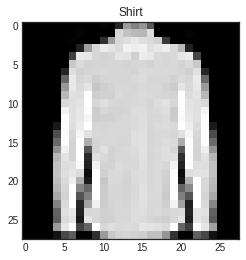

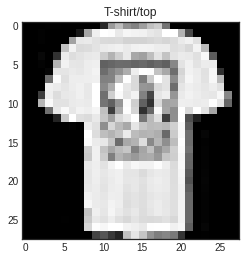

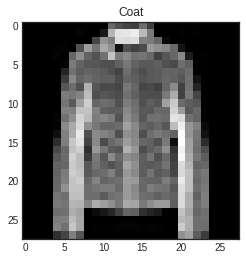

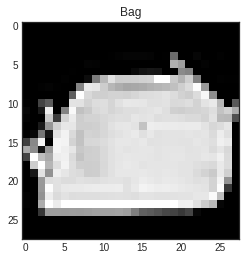

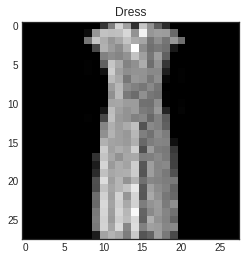

In [50]:
for image, label in train_ds.take(5):
  plt.title('{}'.format(class_names[label[0]]))
  plt.imshow(image[0, :, :], cmap='gray')
  plt.show()

### 모델 생성
- 임의의 모델

In [53]:
def build_model():
  input = Input(shape=(28, 28), name='input')
  flatten = Flatten(input_shape=[28, 28], name='flatten')(input)
  hidden1 = Dense(256, kernel_initializer='he_normal', name='hidden1')(flatten)
  hidden1 = BatchNormalization()(hidden1)
  hidden1 = Activation('relu')(hidden1)
  dropout1 = Dropout(0.5)(hidden1)

  hidden2 = Dense(100, kernel_initializer='he_normal', name='hidden2')(dropout1)
  hidden2 = BatchNormalization()(hidden2)
  hidden2 = Activation('relu')(hidden2)
  dropout2 = Dropout(0.5)(hidden2)
  
  hidden3 = Dense(100, kernel_initializer='he_normal', name='hidden3')(dropout2)
  hidden3 = BatchNormalization()(hidden3)
  hidden3 = Activation('relu')(hidden3)
  dropout3 = Dropout(0.5)(hidden3)
  
  hidden4 = Dense(50, kernel_initializer='he_normal', name='hidden4')(dropout3)
  hidden4 = BatchNormalization()(hidden4)
  hidden4 = Activation('relu')(hidden4)
  dropout4 = Dropout(0.5)(hidden4)
  
  output = Dense(10, activation='softmax', name='output')(dropout4)

  model = Model(inputs=[input], outputs=output)

  return model

In [54]:
model = build_model()

In [55]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 256)               200960    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
hidden2 (Dense)              (None, 100)              

### 모델 컴파일
- 평가(metrics)방식의 다른 방법
  - `tf.keras.metrics.Mean`
  - `tf.keras.metrics.SparseCategoricalAccuracy`

- 위 두 방식을 사용하여 loss값을 좀 더 smooth하게 만들기(평균을 내는 방식)

In [58]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [59]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

### 모델 학습

@tf.function 으로 인해 학습이 시작되면 그래프를 생성하여 속도가 빠름


In [63]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)

  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [64]:
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [65]:
epochs = 20

for epoch in range(epochs):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = "Epochs: {:3d}\tLoss: {:.4f}\tAccuracy: {:.4f}\tTest Loss: {:.4f}\tTest Accuracy: {:.4f}\t"
  print(template.format(epoch+1, train_loss.result(), train_accuracy.result()*100, test_loss.result(), test_accuracy.result()*100))

Epochs:   1	Loss: 0.4889	Accuracy: 82.3683	Test Loss: 0.4044	Test Accuracy: 85.1400	
Epochs:   2	Loss: 0.4286	Accuracy: 84.3683	Test Loss: 0.4102	Test Accuracy: 85.0150	
Epochs:   3	Loss: 0.3970	Accuracy: 85.4222	Test Loss: 0.3981	Test Accuracy: 85.4233	
Epochs:   4	Loss: 0.3756	Accuracy: 86.2092	Test Loss: 0.3997	Test Accuracy: 85.3325	
Epochs:   5	Loss: 0.3589	Accuracy: 86.7857	Test Loss: 0.3897	Test Accuracy: 85.7480	
Epochs:   6	Loss: 0.3455	Accuracy: 87.2678	Test Loss: 0.3800	Test Accuracy: 86.1167	
Epochs:   7	Loss: 0.3340	Accuracy: 87.6793	Test Loss: 0.3762	Test Accuracy: 86.3000	
Epochs:   8	Loss: 0.3237	Accuracy: 88.0413	Test Loss: 0.3766	Test Accuracy: 86.3838	
Epochs:   9	Loss: 0.3149	Accuracy: 88.3474	Test Loss: 0.3769	Test Accuracy: 86.4600	
Epochs:  10	Loss: 0.3071	Accuracy: 88.6163	Test Loss: 0.3734	Test Accuracy: 86.6500	
Epochs:  11	Loss: 0.2997	Accuracy: 88.8848	Test Loss: 0.3705	Test Accuracy: 86.7936	
Epochs:  12	Loss: 0.2929	Accuracy: 89.1265	Test Loss: 0.3696	Test

### 모델 학습 : 2번째 방법 (Keras)

In [66]:
from sklearn.model_selection import train_test_split

In [68]:
(x_train_full, y_train_full), (x_test, y_test) = load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.3, random_state=777)
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(x_test.shape)

model = build_model()
model.compile(optimizer = 'sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

(42000, 28, 28)
(42000,)
(18000, 28, 28)
(18000,)
(10000, 28, 28)
(10000, 28, 28)
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 256)               200960    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
______________________________________

5~6분 소요

In [69]:
from tensorflow.keras.callbacks import EarlyStopping

In [70]:
early_stopping_cb = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)

history = model.fit(x_train, y_train, batch_size=256, epochs = 200, shuffle=True, validation_data=(x_val, y_val), callbacks=[early_stopping_cb])

Epoch 1/200
165/165 [==============================] - 3s 16ms/step - loss: 2.5940 - accuracy: 0.1444 - val_loss: 1.8996 - val_accuracy: 0.5003
Epoch 2/200
165/165 [==============================] - 2s 15ms/step - loss: 2.2097 - accuracy: 0.2177 - val_loss: 1.6408 - val_accuracy: 0.5338
Epoch 3/200
165/165 [==============================] - 2s 14ms/step - loss: 2.0054 - accuracy: 0.2802 - val_loss: 1.4946 - val_accuracy: 0.5594
Epoch 4/200
165/165 [==============================] - 2s 15ms/step - loss: 1.8456 - accuracy: 0.3340 - val_loss: 1.3791 - val_accuracy: 0.5819
Epoch 5/200
165/165 [==============================] - 2s 14ms/step - loss: 1.7120 - accuracy: 0.3824 - val_loss: 1.2751 - val_accuracy: 0.5987
Epoch 6/200
165/165 [==============================] - 2s 15ms/step - loss: 1.6080 - accuracy: 0.4177 - val_loss: 1.1669 - val_accuracy: 0.6138
Epoch 7/200
165/165 [==============================] - 2s 15ms/step - loss: 1.5157 - accuracy: 0.4455 - val_loss: 1.0886 - val_accuracy:

In [71]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 모델 평가

In [72]:
model.evaluate(x_test, y_test, batch_size=100)

100/100 [==============================] - 0s 3ms/step - loss: 0.4382 - accuracy: 0.8441


[0.43822047114372253, 0.8440999984741211]

### 결과 확인

In [73]:
test_img = x_test[0, :, :]
print(test_img.shape)

(28, 28)


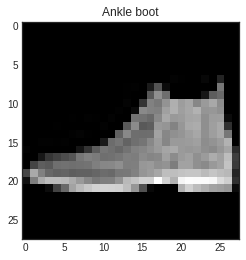

In [76]:
plt.title(class_names[y_test[0]])
plt.imshow(test_img, cmap='gray')
plt.show()

In [77]:
pred = model.predict(test_img.reshape(-1,28,28))

In [79]:
pred.shape

(1, 10)

In [80]:
pred

array([[2.6897182e-05, 2.3012180e-06, 3.6073812e-05, 2.3868815e-05,
        7.5035755e-06, 2.6813358e-02, 8.7166854e-06, 1.5178153e-01,
        7.0063787e-04, 8.2059908e-01]], dtype=float32)

In [81]:
class_names[np.argmax(pred)]

'Ankle boot'

### Test Batch Dataset

In [86]:
test_batch = x_test[:32, :, :]
test_batch_y = y_test[:32]
print(test_batch.shape)

(32, 28, 28)


In [87]:
preds = model.predict(test_batch)
preds.shape

(32, 10)

In [88]:
preds_arg = np.argmax(preds, -1)

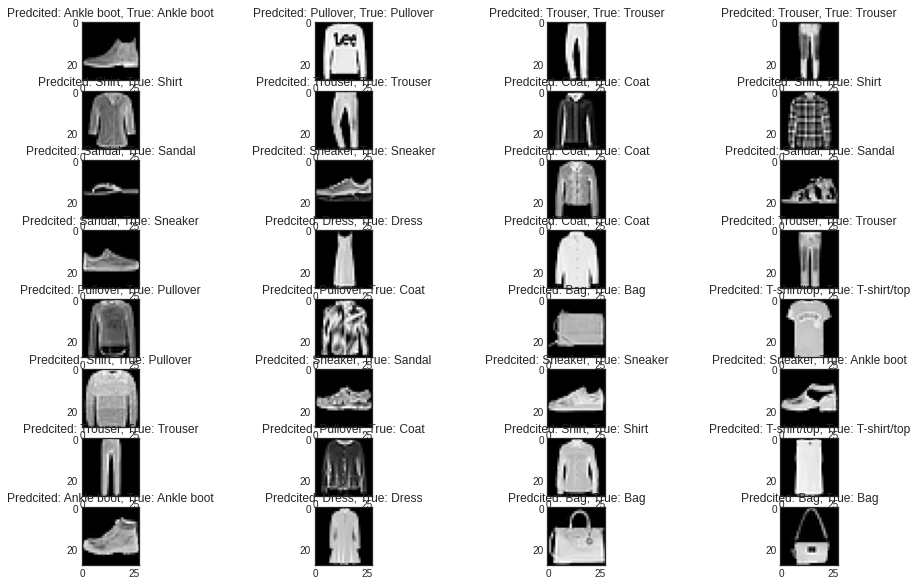

In [89]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

plt.figure(figsize=(16, 10))

for idx in range(1, 33, 1):
  plt.subplot(num_rows, num_cols, idx)
  plt.title('Predcited: {}, True: {}'.format(class_names[preds_arg[idx-1]], 
                                             class_names[test_batch_y[idx-1]]))
  plt.imshow(test_batch[idx-1], cmap='gray')

plt.show()